## 기초 모듈 불러오기

In [1]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from soynlp.normalizer import *
from hanspell import spell_checker
from konlpy.tag import Okt

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# 한글화
import koreanize_matplotlib 

## 파일 불러오기 및 말뭉치 만들기

In [2]:
# 파일 불러오기

review_df = pd.read_csv('./[JHS]preprocessed_data.csv', encoding='utf-8', index_col=0) # df_review는 전체년도 리뷰 크롤링 파일
review_df.head()

,date,review,rating,review_tokens,review_tokens_removeST,review_tokens_removeST_vec,label
0,2023-09-10,상세 설명에 들어가지 않아도 검색 결과에서 중량과 가격이 바로 확인되면 더 편리하겠습니다,5,"['상세', '설명', '검색', '결과', '중량', '가격', '바로', '확인...","['가격', '설명', '상세', '중량']",가격 설명 상세 중량,1
1,2023-09-09,필터 기능 잘 되어있어 편하게 쇼핑함,5,"['필터', '기능', '쇼핑', '함']","['기능', '필터']",기능 필터,1
2,2023-09-09,배송이 빨라요 그리고 할인이 많아요,5,"['배송', '할인']","['배송', '할인']",배송 할인,1
3,2023-09-09,50퍼 쿠폰 만원 빵빵하게 주는 곳 처음 봄 주문하면 6시간 만에 옴 이 앱 뭐지,5,"['쿠폰', '만원', '빵빵', '곳', '처음', '봄', '주문', '옴', ...","['만원', '쿠폰', '주문']",만원 쿠폰 주문,1
4,2023-09-09,빠른 배송,5,['배송'],['배송'],배송,1


In [11]:
tmp_contents_for_vectorize = review_df['review_tokens_removeST_vec'][:5]
tmp_contents_for_vectorize

0     가격 설명 상세 중량
1           기능 필터
2           배송 할인
3        만원 쿠폰 주문
4              배송
Name: review_tokens_removeST_vec, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2)

tmp_X = vectorizer.fit_transform(tmp_contents_for_vectorize)
tmp_X.shape

(5, 1)

In [16]:
vectorizer.get_feature_names_out()

array(['배송'], dtype=object)

In [5]:
len(review_df)

9926

In [6]:
## 말뭉치 만들기

import ast

nouns_list = []

for tokens in review_df['review_tokens_removeST']:
    
    nouns_list.extend(ast.literal_eval(tokens))
    
nouns_list_set = list(set(nouns_list))
print('토큰화 말뭉치 개수 :',len(nouns_list))
print('중복을 제거한 말뭉치 개수 :',len(nouns_list_set))

토큰화 말뭉치 개수 : 46215
중복을 제거한 말뭉치 개수 : 4686


In [7]:
nouns_list[:10]

['가격', '설명', '상세', '중량', '기능', '필터', '배송', '할인', '만원', '쿠폰']

## 토크나이저 기준 벡터화

In [8]:
# 벡터화
tokenizer_okt = Okt()

vectorizer_tfidf = TfidfVectorizer(min_df=5, decode_error='ignore',tokenizer=tokenizer_okt.nouns) # max_features=3000

contents_for_vectorize = review_df['review_tokens_removeST_vec']
X = vectorizer_tfidf.fit_transform(contents_for_vectorize)
X.shape

C:\Users\Sam\miniconda3\envs\ds_study\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(9926, 1179)

In [9]:
y = review_df['label']
y.shape

(9926,)

In [10]:
#  로지스틱 회귀 학습하기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=review_df['label'])

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9021410579345088
Test Acc :  0.8856998992950654


In [11]:
vectorizer_tfidf.vocabulary_

{'가격': 1,
 '설명': 534,
 '상세': 505,
 '기능': 126,
 '필터': 1123,
 '배송': 402,
 '할인': 1135,
 '만원': 311,
 '쿠폰': 1052,
 '주문': 924,
 '대박': 224,
 '제품': 897,
 '포장': 1104,
 '완전': 712,
 '초대': 1001,
 '구매': 102,
 '상품': 512,
 '식품': 596,
 '만족': 312,
 '새벽': 517,
 '적립금': 850,
 '이벤트': 772,
 '운영': 726,
 '결제': 64,
 '베송': 418,
 '알람': 647,
 '누락': 187,
 '결재': 62,
 '물품': 369,
 '냉동식품': 172,
 '집': 974,
 '혜택': 1151,
 '보냉': 430,
 '비용': 472,
 '금액': 121,
 '알림': 648,
 '환불': 1165,
 '오류': 695,
 '카드': 1035,
 '불가': 458,
 '장바구니': 831,
 '먹통': 329,
 '업데이트': 673,
 '홈': 1153,
 '목록': 349,
 '버튼': 412,
 '화면': 1159,
 '찜': 983,
 '속도': 550,
 '채소': 993,
 '생각': 521,
 '차별': 986,
 '회원': 1170,
 '주소지': 928,
 '리뷰': 296,
 '지역': 958,
 '신용카드': 606,
 '폰': 1108,
 '품질': 1113,
 '샐러드': 519,
 '관리': 95,
 '퀄리티': 1054,
 '온라인': 706,
 '배달': 400,
 '음식': 755,
 '친구': 1032,
 '품절': 1112,
 '요새': 720,
 '배송지': 404,
 '낭비': 163,
 '최악': 1013,
 '도착': 255,
 '맞벌이': 319,
 '가정': 13,
 '장점': 836,
 '가장': 12,
 '하루': 1128,
 '로딩': 290,
 '다양': 194,
 '구입': 105,
 '직접': 967,
 '답변'

## 파이프라인

정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요합니다. = F1 스코어


In [18]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

X = review_df['review_tokens_removeST_vec']
y = review_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

skfold = StratifiedKFold(n_splits=5)

pipe_countvec = Pipeline([
                ('vec', CountVectorizer(decode_error='ignore')),
                ('fit', LogisticRegression(solver='saga'))])

pipe_tfidfvec = Pipeline([
                ('vec', TfidfVectorizer(decode_error='ignore')),
                ('fit', LogisticRegression(solver='saga'))])

# vec -> ngram_range = (1, 2))
ks = [1,5]#10,20] # 벡터화 문장이 몇번 반복되는지 최소 반복수
max_iters = [500]#, 1000, 1200] # gradientdecent 얼마나 반복할건지 반복수
l1_ratios = [0.25, 0.5, 0.75]
cs = [0.01, 0.1, 1, 5] # 규제 정도, 클수록 훈련을 복잡하게한다.(규제가 약하다는 소리) -> 하지만 과적합 우려
penaltys = ['l1','l2', 'elasticnet', 'none'] # 규제를 뭐로 할거냐

grid_params_countvec = [{
    "vec__min_df" : ks,
    "vec__vocabulary" : nouns_list, # 말뭉치 기준
    "fit__C": cs,
    "fit__penalty" : penaltys,
    "fit__l1_ratio" : l1_ratios,
    "fit__max_iter": max_iters
}]

grid_params_tfidfvec = grid_params_countvec


pipe = [pipe_countvec , pipe_tfidfvec ]
params = [grid_params_countvec , grid_params_tfidfvec]

jobs = 20

grid_dict = {
    0: 'Countvec', 
    1: 'Tfidfvec',
            }

model_object = {}; model_acc = {}; model_roc_auc = {}; model_f1 = {}; model_best_params = {}

#1. scoring = 'neg_mean_absolute_error' 로 설정.
# 일반적으로 scoring을 값이 클 수록 모델 성능이 좋은 것으로 사이킷런에서 인식하는데, 
# mae는 값이 클 수록 모델 성능이 저하되는 것이므로 Negative 키워드를 붙여서 사용

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "f1", cv=skfold,
                           n_jobs=jobs , verbose=True ) #  verbose가 있으면 함수 수행시 발생하는 상세한 정보 출력
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
       
    model_object[grid_dict.get(idx)] = search
    model_acc[grid_dict.get(idx)] = accuracy_score(y_test, y_pred)  
    model_roc_auc[grid_dict.get(idx)] = roc_auc_score(y_test, y_pred)
    model_f1[grid_dict.get(idx)] = f1_score(y_test, y_pred)

    model_best_params[grid_dict.get(idx)] = search.best_params_
    
print("finish")

fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_f1.keys() , model_f1.values()], index = ["algo","f1"]).T # .T : 행 렬 변환
output.sort_values(["f1"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="f1", data=output)
plt.show()

Fitting 5 folds for each of 449856 candidates, totalling 2249280 fits


KeyboardInterrupt: 

In [8]:
model_acc

{'Countvec': 0.8836858006042296, 'Tfidfvec': 0.8867069486404834}

In [9]:
model_f1

{'Countvec': 0.9279700654817588, 'Tfidfvec': 0.9298846992832658}

In [10]:
model_roc_auc

{'Countvec': 0.7846510055274608, 'Tfidfvec': 0.7882173938609902}

In [11]:
model_best_params

{'Countvec': {'fit__C': 5,
  'fit__l1_ratio': 0.25,
  'fit__max_iter': 500,
  'fit__penalty': 'l2',
  'vec__min_df': 1},
 'Tfidfvec': {'fit__C': 5,
  'fit__l1_ratio': 0.25,
  'fit__max_iter': 1000,
  'fit__penalty': 'l2',
  'vec__min_df': 1}}

In [12]:
best_model = model_object["Tfidfvec"].best_estimator_.named_steps.fit
best_model

LogisticRegression(C=5, l1_ratio=0.25, max_iter=1000, solver='saga')

## 위 코드 너무 길어서 베스트 임시 모델

In [12]:
best_vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore',tokenizer=tokenizer_okt.nouns) # max_features=3000

contents_for_vectorize = review_df['review_tokens_removeST_vec']
X = best_vectorizer.fit_transform(contents_for_vectorize)
y = review_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

best_model = LogisticRegression(C=5,l1_ratio=0.25,max_iter=1000,solver='saga', penalty='elasticnet', random_state=13)
best_model.fit(X_train, y_train)

y_pred_tr = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

C:\Users\Sam\miniconda3\envs\ds_study\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Acc :  0.9429471032745592
Test Acc :  0.8862034239677744


## 오즈비

로지스틱 회귀 함수를 돌고 나온것은 선형관계식임, 즉, 오즈비를 구할라면 선형관계식의 계수에 e를 취하면 구할 수 있다.<br><br>
성공, 실패에 얼마나 영향을 끼치냐를 볼 때, 함수에서 나온 결과는 선형관계식일 때의 계수이기 때문에 <br>
실제 얼마나 영향을 끼치냐는 오즈비로 보는 것 이다...?
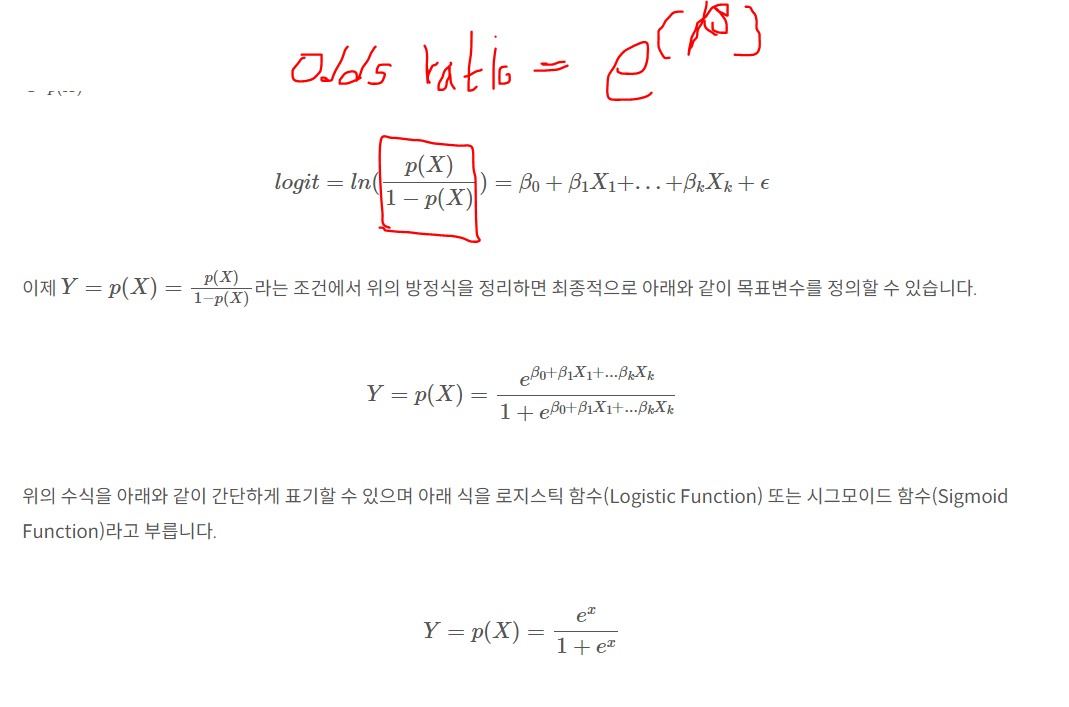

In [13]:
best_model.coef_

array([[-2.28216249,  0.        ,  0.50520483, ..., -2.00483896,
         0.17021998, -0.7498478 ]])

In [14]:
best_model.coef_[0][0]

-2.2821624874702944

In [15]:
odds_ratio = []
for coef in best_model.coef_[0]:
    odds_ratio.append(np.exp(coef))

In [16]:
odds_ratio

[0.10206325738628722,
 1.0,
 1.6573249637399574,
 3.788325924237877,
 0.2715292165737757,
 1.0,
 1.0,
 2.461060152011859,
 1.0,
 0.41618218278174757,
 1.5688312343358368,
 1.0,
 0.7771653354517261,
 1.6781345549837712,
 0.7078263824278049,
 0.3248899205249583,
 1.0,
 1.1618172896289802,
 1.0,
 0.43775175220215495,
 0.35469903080190635,
 0.28310718370666005,
 1.0,
 1.0,
 1.9183550046961695,
 1.0,
 2.2880140584980535,
 1.0,
 0.9936950470462561,
 0.9883337500091478,
 0.3983085513672742,
 1.0,
 0.42110259387625687,
 1.3823663247822937,
 1.0,
 1.0,
 1.0,
 1.0,
 1.7096828826064818,
 1.0,
 1.4564731054655033,
 9.377685103614061,
 1.0,
 1.829700946749472,
 1.0,
 1.0,
 1.0342170318687338,
 0.3602622734587725,
 1.0235930001899887,
 0.4708470299305083,
 0.5896036517866772,
 0.4775989697664627,
 0.4584941797938673,
 0.559493645370081,
 1.6450934514671258,
 1.0,
 1.127088172852884,
 0.4755849854794143,
 1.9859901658878685,
 1.0813539502362324,
 0.7373191154718466,
 1.0977835202537327,
 1.0,
 1.0,
 

In [17]:
best_vectorizer.vocabulary_

{'가격': 3,
 '설명': 2049,
 '상세': 1936,
 '중량': 3589,
 '기능': 474,
 '필터': 4366,
 '배송': 1543,
 '할인': 4420,
 '만원': 1212,
 '쿠폰': 4056,
 '주문': 3545,
 '대박': 836,
 '제품': 3461,
 '포장': 4288,
 '완전': 2816,
 '초대': 3859,
 '구매': 370,
 '상품': 1953,
 '식품': 2324,
 '만족': 1214,
 '새벽': 1966,
 '적립금': 3328,
 '이벤트': 3058,
 '운영': 2900,
 '결제': 210,
 '베송': 1613,
 '알람': 2497,
 '누락': 716,
 '결재': 208,
 '물품': 1404,
 '냉동식품': 651,
 '집': 3708,
 '혜택': 4514,
 '오타': 2782,
 '보냉': 1652,
 '비용': 1807,
 '금액': 464,
 '알림': 2501,
 '환불': 4582,
 '오류': 2752,
 '카드': 3962,
 '불가': 1753,
 '장바구니': 3272,
 '먹통': 1272,
 '업데이트': 2625,
 '홈': 4543,
 '목록': 1338,
 '버튼': 1582,
 '화면': 4559,
 '찜': 3749,
 '속도': 2131,
 '채소': 3796,
 '생각': 1978,
 '차별': 3756,
 '회원': 4605,
 '주소지': 3552,
 '리뷰': 1149,
 '지역': 3657,
 '신용카드': 2347,
 '폰': 4305,
 '품질': 4325,
 '샐러드': 1976,
 '관리': 338,
 '매장': 1248,
 '퀄리티': 4066,
 '온라인': 2796,
 '배달': 1535,
 '동물': 962,
 '용이': 2878,
 '음식': 3014,
 '섬네일': 2055,
 '판정': 4225,
 '친구': 3951,
 '품절': 4323,
 '요새': 2855,
 '배송지': 1545,
 '낭비': 628,
 

In [18]:
# 단어 사전에서 인덱스, 값으로 위치 변경
id_to_word = {v: k for k, v in best_vectorizer.vocabulary_.items()}
print(id_to_word)

{3: '가격', 2049: '설명', 1936: '상세', 3589: '중량', 474: '기능', 4366: '필터', 1543: '배송', 4420: '할인', 1212: '만원', 4056: '쿠폰', 3545: '주문', 836: '대박', 3461: '제품', 4288: '포장', 2816: '완전', 3859: '초대', 370: '구매', 1953: '상품', 2324: '식품', 1214: '만족', 1966: '새벽', 3328: '적립금', 3058: '이벤트', 2900: '운영', 210: '결제', 1613: '베송', 2497: '알람', 716: '누락', 208: '결재', 1404: '물품', 651: '냉동식품', 3708: '집', 4514: '혜택', 2782: '오타', 1652: '보냉', 1807: '비용', 464: '금액', 2501: '알림', 4582: '환불', 2752: '오류', 3962: '카드', 1753: '불가', 3272: '장바구니', 1272: '먹통', 2625: '업데이트', 4543: '홈', 1338: '목록', 1582: '버튼', 4559: '화면', 3749: '찜', 2131: '속도', 3796: '채소', 1978: '생각', 3756: '차별', 4605: '회원', 3552: '주소지', 1149: '리뷰', 3657: '지역', 2347: '신용카드', 4305: '폰', 4325: '품질', 1976: '샐러드', 338: '관리', 1248: '매장', 4066: '퀄리티', 2796: '온라인', 1535: '배달', 962: '동물', 2878: '용이', 3014: '음식', 2055: '섬네일', 4225: '판정', 3951: '친구', 4323: '품절', 2855: '요새', 1545: '배송지', 628: '낭비', 3890: '최악', 2604: '언급', 940: '도착', 1237: '맞벌이', 40: '가정', 3285: '장점', 38: '가장

In [19]:
## 오즈비, 계수, 인덱스 순서로 추출
coef_index = sorted(((np.exp(value), value, index) for index, value in enumerate(best_model.coef_[0])), reverse = False)
coef_neg_index = coef_index[:10]
coef_pos_index = coef_index[-10:]
#print(coef_pos_index[-3:])
#print(coef_neg_index [:3])
print(coef_index[0])

(0.0019698157461429137, -6.229815270483125, 3890)


## 오즈비 시각화

In [20]:
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index:
    print(id_to_word[coef[2]], round(coef[0],2))
    pos_top_word.append(id_to_word[coef[2]])
    pos_top_score.append(round(coef[0],2))

neg_top_word=[] 
neg_top_score=[]
for coef in coef_neg_index:
    print(id_to_word[coef[2]], round(coef[0],2))
    neg_top_word.append(id_to_word[coef[2]])
    neg_top_score.append(round(coef[0],2))

배송 15.57
코로나 15.61
감동 16.61
맘 16.62
온라인 17.33
신세계 17.74
만족 24.39
먹거리 30.15
장보기 30.25
포장 30.47
최악 0.0
엉망 0.0
오아시스 0.0
오류로 0.01
회원 0.01
입력 0.01
업데이트 0.01
불가 0.01
삭제 0.01
문의 0.01


In [21]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul set complete in your MAC!")
    rc("font", family = "Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Hangul set complete in your Windows!")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)

else:
    print("Unknown your system....")
    
plt.rcParams["axes.unicode_minus"] = False

def seaborn_Hangul():
    ## seaborn 한글
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')
seaborn_Hangul();

Hangul set complete in your Windows!


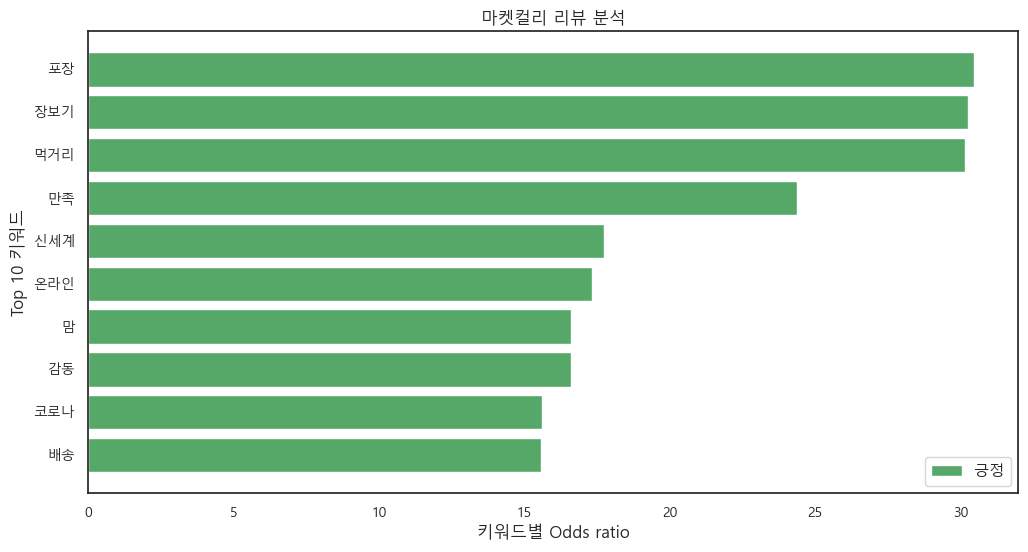

In [22]:
plt.figure(figsize=[12, 6])
#plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.xlabel('키워드별 Odds ratio')
plt.ylabel('Top 10 키워드')
plt.title('마켓컬리 리뷰 분석')
plt.show()

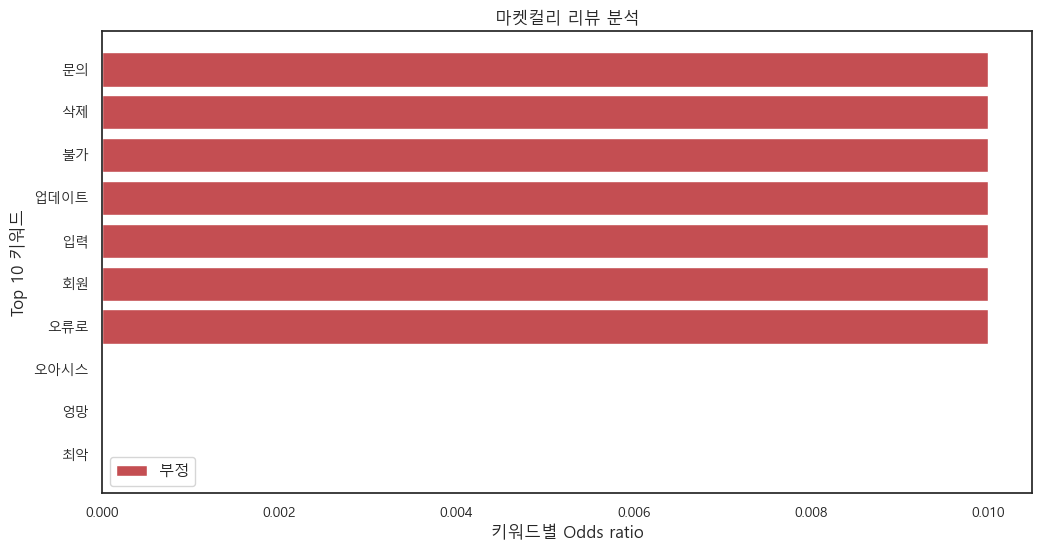

In [23]:
plt.figure(figsize=[12, 6])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
#plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.xlabel('키워드별 Odds ratio')
plt.ylabel('Top 10 키워드')
plt.title('마켓컬리 리뷰 분석')
plt.show()

## 그래프로 나타내기 힘드므로... 그냥 표로

In [24]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [25]:
top10_pos_odds = pd.DataFrame(list(zip(pos_top_word, pos_top_score)), columns=['키워드', '오즈비'])
top10_neg_odds = pd.DataFrame(list(zip(neg_top_word, neg_top_score)), columns=['키워드', '오즈비'])

print('------상위------', '-------하위------')
display_side_by_side(top10_pos_odds.sort_values(by='오즈비', ascending=False, ignore_index=True),
                     top10_neg_odds.sort_values(by='오즈비', ascending=True,ignore_index=True))

------상위------ -------하위------


,키워드,오즈비
0,포장,30.47
1,장보기,30.25
2,먹거리,30.15
3,만족,24.39
4,신세계,17.74
5,온라인,17.33
6,맘,16.62
7,감동,16.61
8,코로나,15.61
9,배송,15.57


## 말뭉치 빈도수 

In [26]:
from collections import Counter

counts_nouns_list = Counter(nouns_list)
counts_nouns_df = pd.DataFrame.from_dict([counts_nouns_list]).T
counts_nouns_df.columns = ['빈도수']
counts_nouns_df

print('------상위-----', '------하위-----')
display_side_by_side(counts_nouns_df.sort_values(by='빈도수', ascending=False).head(10),
                     counts_nouns_df.sort_values(by='빈도수', ascending=True).head(10))

------상위----- ------하위-----


,빈도수
배송,2670
상품,1361
제품,924
주문,903
쿠폰,652
새벽,612
구매,584
포장,519
가격,451
장바구니,431


## 오즈비 vs 빈도수 

In [27]:
print('--------------긍정--------------', '--------------부정--------------')
print('--------------------------------', '--------------------------------')
display_side_by_side(top10_pos_odds.sort_values(by='오즈비', ascending=False, ignore_index=True),
                     counts_nouns_df.sort_values(by='빈도수', ascending=False).head(10),
                     top10_neg_odds.sort_values(by='오즈비', ascending=True,ignore_index=True),
                    counts_nouns_df.sort_values(by='빈도수', ascending=True).head(10))

--------------긍정-------------- --------------부정--------------
-------------------------------- --------------------------------


,키워드,오즈비
0,포장,30.47
1,장보기,30.25
2,먹거리,30.15
3,만족,24.39
4,신세계,17.74
5,온라인,17.33
6,맘,16.62
7,감동,16.61
8,코로나,15.61
9,배송,15.57


In [28]:
best_vectorizer.vocabulary_

{'가격': 3,
 '설명': 2049,
 '상세': 1936,
 '중량': 3589,
 '기능': 474,
 '필터': 4366,
 '배송': 1543,
 '할인': 4420,
 '만원': 1212,
 '쿠폰': 4056,
 '주문': 3545,
 '대박': 836,
 '제품': 3461,
 '포장': 4288,
 '완전': 2816,
 '초대': 3859,
 '구매': 370,
 '상품': 1953,
 '식품': 2324,
 '만족': 1214,
 '새벽': 1966,
 '적립금': 3328,
 '이벤트': 3058,
 '운영': 2900,
 '결제': 210,
 '베송': 1613,
 '알람': 2497,
 '누락': 716,
 '결재': 208,
 '물품': 1404,
 '냉동식품': 651,
 '집': 3708,
 '혜택': 4514,
 '오타': 2782,
 '보냉': 1652,
 '비용': 1807,
 '금액': 464,
 '알림': 2501,
 '환불': 4582,
 '오류': 2752,
 '카드': 3962,
 '불가': 1753,
 '장바구니': 3272,
 '먹통': 1272,
 '업데이트': 2625,
 '홈': 4543,
 '목록': 1338,
 '버튼': 1582,
 '화면': 4559,
 '찜': 3749,
 '속도': 2131,
 '채소': 3796,
 '생각': 1978,
 '차별': 3756,
 '회원': 4605,
 '주소지': 3552,
 '리뷰': 1149,
 '지역': 3657,
 '신용카드': 2347,
 '폰': 4305,
 '품질': 4325,
 '샐러드': 1976,
 '관리': 338,
 '매장': 1248,
 '퀄리티': 4066,
 '온라인': 2796,
 '배달': 1535,
 '동물': 962,
 '용이': 2878,
 '음식': 3014,
 '섬네일': 2055,
 '판정': 4225,
 '친구': 3951,
 '품절': 4323,
 '요새': 2855,
 '배송지': 1545,
 '낭비': 628,
 